In [1]:
# from google.colab import auth
# auth.authenticate_user()
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
import torchvision.datasets as datasets
DATA_PATH = '/content/gdrive/MyDrive/pytest/datasets/'
train_set = datasets.MNIST(root = DATA_PATH, train = True, download = True)
print("data size:", len(train_set))

data size: 60000


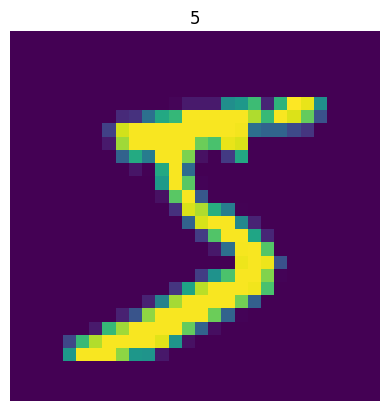

In [4]:
import matplotlib.pyplot as plt
train_images, train_labels = train_set[0]
plt.title(train_labels)
plt.imshow(train_images)
plt.axis('off')
plt.show()

In [5]:
print("데이터의 타입:", type(train_images))
print("데이터 라벨:", type(train_labels))

데이터의 타입: <class 'PIL.Image.Image'>
데이터 라벨: <class 'int'>


In [6]:
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.ToTensor()])

In [7]:
train_set = datasets.MNIST(root = DATA_PATH, train = True, download =True, transform = transform)
print("data size:", len(train_set)) # 60000

data size: 60000


In [8]:
train_images, train_labels = train_set[0] # 60,000 개 데이터 중 첫 번째 하나만 가져옴
print("데이터의 타입:", type(train_images))
print("데이터 라벨:", type(train_labels))

데이터의 타입: <class 'torch.Tensor'>
데이터 라벨: <class 'int'>


In [9]:
print("데이터 shape:", train_images.shape)
print("데이터 차원:", train_images.dim())
print("데이터 최솟값:", train_images.min())
print("데이터 최댓값:", train_images.max())

데이터 shape: torch.Size([1, 28, 28])
데이터 차원: 3
데이터 최솟값: tensor(0.)
데이터 최댓값: tensor(1.)


In [10]:
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1))
]) # 1차원으로 변

In [11]:
train_set = datasets.MNIST(root = DATA_PATH, train = True,download = True, transform = transform)
print("data size:", len(train_set)) # 60000

data size: 60000


In [12]:
train_images, train_labels = train_set[0] # 60,000 개 데이터 중 첫 번째 하나만 가져옴
print("데이터의 타입:", type(train_images))
print("데이터 라벨:", type(train_labels))
print("데이터 shape:", train_images.shape)
print("데이터 차원:", train_images.dim())
print("데이터 최솟값:", train_images.min())
print("데이터 최댓값:", train_images.max())

데이터의 타입: <class 'torch.Tensor'>
데이터 라벨: <class 'int'>
데이터 shape: torch.Size([784])
데이터 차원: 1
데이터 최솟값: tensor(-1.)
데이터 최댓값: tensor(1.)


In [13]:
print(train_images)
print(train_labels)

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

In [14]:
test_set = datasets.MNIST(root = DATA_PATH, train = False, download =True, transform = transform)
print("data size:", len(test_set)) # 10000

data size: 10000


In [15]:
from torch.utils.data import DataLoader
batch_size = 256
# 데이터로더 생성
train_loader = DataLoader(train_set, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_set, batch_size = batch_size, shuffle = False)
print("학습 데이터 배치 개수:", len(train_loader)) # 235 ※ 검증 데이터는 shuffle이 필요하지 않다

학습 데이터 배치 개수: 235


In [16]:
for images, labels in train_loader:
  break
print(images.shape)
print(labels.shape)
print(images)
print(labels)

torch.Size([256, 784])
torch.Size([256])
tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])
tensor([3, 4, 8, 2, 0, 8, 5, 3, 3, 3, 9, 9, 6, 8, 1, 0, 9, 7, 7, 2, 5, 4, 4, 7,
        7, 9, 8, 9, 1, 3, 5, 5, 0, 9, 8, 7, 0, 9, 7, 1, 1, 2, 8, 7, 2, 6, 1, 8,
        8, 3, 9, 2, 8, 2, 9, 7, 7, 5, 6, 3, 8, 2, 1, 1, 2, 1, 1, 7, 5, 3, 0, 7,
        1, 2, 2, 1, 6, 7, 1, 9, 6, 2, 0, 2, 1, 9, 5, 4, 4, 9, 5, 4, 3, 3, 4, 4,
        4, 7, 9, 4, 3, 1, 8, 8, 2, 1, 0, 9, 6, 9, 2, 9, 2, 0, 7, 4, 9, 4, 0, 1,
        7, 8, 3, 9, 0, 7, 2, 5, 1, 0, 4, 0, 9, 0, 2, 2, 0, 1, 0, 4, 1, 6, 3, 1,
        1, 3, 8, 5, 3, 6, 4, 2, 6, 7, 2, 9, 4, 9, 9, 3, 0, 9, 5, 2, 8, 1, 9, 7,
        7, 8, 0, 9, 9, 4, 4, 6, 2, 6, 8, 4, 7, 3, 2, 0, 3, 9, 1, 3, 3, 1, 0, 8,
        3, 8, 6, 1, 4, 1, 5, 

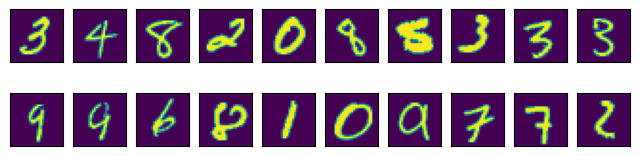

In [17]:
plt.figure(figsize=(8, 2))
for i in range(20):
  ax= plt.subplot(2, 10,i+ 1)

  # 넘파이 배열로 변환
  image = images[i].numpy()
  label= labels[i]

  # 이미지 출력
  plt.imshow(image.reshape(28, 28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [18]:
input_size = image.shape[0]
output_size = len(set(labels.numpy())) # 파이썬의 set()은 유니크한 값을 출력한다
print("입력 차원수:", input_size)
print("출력 차원수:", output_size)

입력 차원수: 784
출력 차원수: 10


In [19]:
import torch.nn as nn
class Net(nn.Module):
  def __init__(self, input_size, output_size, hidden_size):
    super().__init__()
    # 은닉층 정의
    self.l1 = nn.Linear(input_size, hidden_size)
    # 출력층 정의
    self.l2 = nn.Linear(hidden_size, output_size)
    # ReLU 함수 정의
    self.relu = nn.ReLU(inplace=True) # inplace 옵션이 있는 경우는 True하는 것이 권장된다. 입력값을 직접 변경하여 메모리 사용량을 줄인다
  def forward(self, x):
    x1 = self.l1(x)
    x2 = self.relu(x1) # 첫번째 은닉층 다음에 활성화함수를 사용했다. 뒤의 손실함수가 softmax를 포함할 것이므로 출력층 다음에 활성화함수는 사용하지 않는다
    y = self.l2(x2)
    return y

In [20]:
# 난수 고정. 딥러닝 네트워크의 가중치 난수 발생은 완전히 제어할 수는 없다
torch.manual_seed(111)
torch.cuda.manual_seed(111)
# 모델 객체 생성
hidden_size = 128
net = Net(input_size, output_size, hidden_size)
# 모델을 GPU로 전송. GPU를 사용할 때는 이 과정을 추가해야 한다
net = net.to(device)
# 모델 개요
print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [21]:
# optimizer = torch.optim.SGD(net.parameters(), lr=0.01) # 최적화 알고리즘: 경사 하강법
criterion = nn.CrossEntropyLoss().to(device) # 손실함수. 교차 엔트로피 함수
# 훈련 데이터셋의 처음 항목을 추출
for images, labels in train_loader:
  break
# 데이터로더에서 받은 데이터를 GPU로 전송
X_train = images.to(device)
y_train = labels.to(device)
pred_train = net(X_train) # 예측 계산
loss = criterion(pred_train, y_train) # 손실 계산

In [22]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

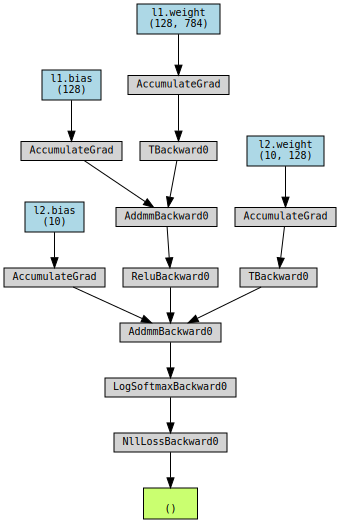

In [23]:
# 손실값 생성까지의 계산 그래프
from torchviz import make_dot
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [26]:
import numpy as np
import torch.optim as optim
# 학습률
lr = 0.01
# 손실 함수：교차 엔트로피 함수. softmax를 포함한다
criterion = nn.CrossEntropyLoss().to(device)
# 최적화 함수 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)
# 반복 횟수
num_epochs = 10
# 평가 결과 기록
history = np.zeros((0,5))

In [27]:
from tqdm.notebook import tqdm
# 미니배치를 이용한 훈련
for epoch in range(num_epochs):
  train_acc, train_loss = 0, 0 # 훈련데이터 정확도, 손실값 초기화
  test_acc, test_loss = 0, 0 # 테스트데이터 정확도, 손실값 초기화
  n_train, n_test = 0, 0 # 진행 정도 초기화
  # 훈련 데이터 학습 과정
  for X_train, y_train in tqdm(train_loader): # 데이터로더에서 데이터를 하나씩 가져온다
    n_train += len(y_train) # 훈련량 기록
    # 추출한 데이터를 GPU로 전송
    X_train = X_train.to(device)
    y_train = y_train.to(device)

    pred_train = net(X_train) # 예측 계산
    loss_train = criterion(pred_train, y_train) # 손실 계산. softmax 포함
    optimizer.zero_grad() # 새로운 배치마다 기울기 초기화
    loss_train.backward() # 기울기 계산
    optimizer.step() # 파라미터 수정
    result_train = torch.max(pred_train, 1)[1] # 예측 라벨 산출
    # 훈련데이터 평가
    train_loss += loss_train.item() # 손실값 추출 및 누적
    train_acc += (result_train == y_train).sum().item() # 정확도 계산 및 누적
  # 평가 데이터 예측. 기울기 계산과 관련된 부분은 없다
  for X_test, y_test in test_loader:
    n_test += len(y_test) # 평가량 기록
    # 추출한 데이터를 GPU로 전송
    X_test = X_test.to(device)
    y_test = y_test.to(device)
    pred_test = net(X_test) # 예측 계산
    loss_test = criterion(pred_test, y_test) # 손실 계산
    result_test = torch.max(pred_test, 1)[1] # 예측 라벨 산출
    # 테스트데이터 평가
    test_loss += loss_test.item() # 손실값 추출 및 누적
    test_acc += (result_test == y_test).sum().item() # 정확도 계산 및 누적

  # 평가 결과 산출, 기록
  train_acc = train_acc / n_train
  test_acc = test_acc / n_test
  train_loss = train_loss * batch_size / n_train
  test_loss = test_loss * batch_size / n_test
  print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {test_loss:.5f}, val_acc: {test_acc:.5f}')
  item = np.array([epoch+1 , train_loss, train_acc, test_loss, test_acc])
  history = np.vstack((history, item))

  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [1/10], loss: 0.22370 acc: 0.93732 val_loss: 0.22157, val_acc: 0.93790


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [2/10], loss: 0.21988 acc: 0.93847 val_loss: 0.21963, val_acc: 0.93800


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.21656 acc: 0.93918 val_loss: 0.21539, val_acc: 0.93820


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.21284 acc: 0.94033 val_loss: 0.21070, val_acc: 0.93950


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.20940 acc: 0.94175 val_loss: 0.20849, val_acc: 0.94120


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.20584 acc: 0.94250 val_loss: 0.20426, val_acc: 0.94090


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.20285 acc: 0.94338 val_loss: 0.20218, val_acc: 0.94210


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.19934 acc: 0.94432 val_loss: 0.20021, val_acc: 0.94240


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.19664 acc: 0.94468 val_loss: 0.19777, val_acc: 0.94270


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.19362 acc: 0.94640 val_loss: 0.19412, val_acc: 0.94350


In [28]:
print(history)

[[ 1.          0.22370397  0.93731667  0.2215679   0.9379    ]
 [ 2.          0.2198786   0.93846667  0.21962915  0.938     ]
 [ 3.          0.21655863  0.93918333  0.21539457  0.9382    ]
 [ 4.          0.21283956  0.94033333  0.21069612  0.9395    ]
 [ 5.          0.20939599  0.94175     0.20849044  0.9412    ]
 [ 6.          0.20583849  0.9425      0.20426023  0.9409    ]
 [ 7.          0.20284559  0.94338333  0.20217604  0.9421    ]
 [ 8.          0.19933906  0.94431667  0.20021075  0.9424    ]
 [ 9.          0.19663763  0.94468333  0.19777067  0.9427    ]
 [10.          0.19361628  0.9464      0.19412317  0.9435    ]]


In [29]:
print('Test Data 평가결과:')
print(f'초기상태> 손실값: {history[0, 3]:.5f} 정확도: {history[0, 4]:.5f}')
print(f'최종상태> 손실값: {history[-1, 3]:.5f} 정확도: {history[-1, 4]:.5f}')

Test Data 평가결과:
초기상태> 손실값: 0.22157 정확도: 0.93790
최종상태> 손실값: 0.19412 정확도: 0.94350


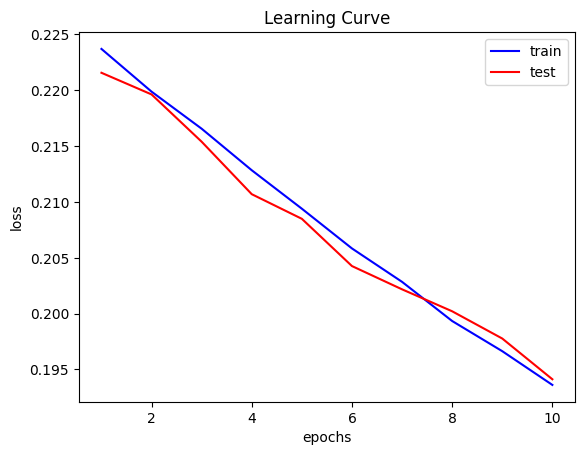

In [30]:
plt.plot(history[:,0], history[:,1], 'blue', label='train')
plt.plot(history[:,0], history[:,3], 'red', label='test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

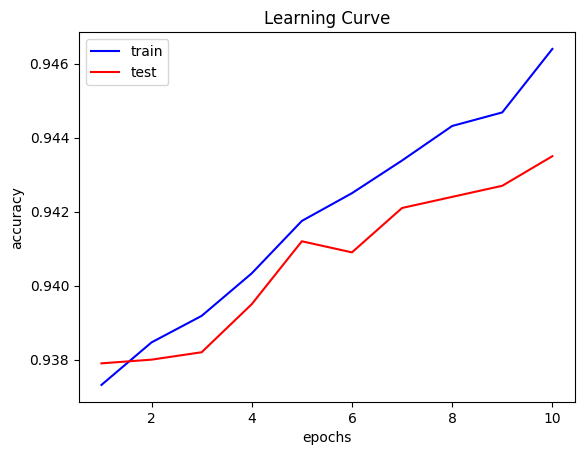

In [31]:
plt.plot(history[:,0], history[:,2], 'blue', label='train')
plt.plot(history[:,0], history[:,4], 'red', label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [32]:
# 데이터로더에서 처음 한 세트 가져오기
for images, labels in test_loader:
  break
# 예측 결과 가져오기
inputs = images.to(device)
labels = labels.to(device)
outputs = net(inputs)
predicted = torch.max(outputs, 1)[1] # [0]은 최댓값, [1]은 최댓값의 인덱스

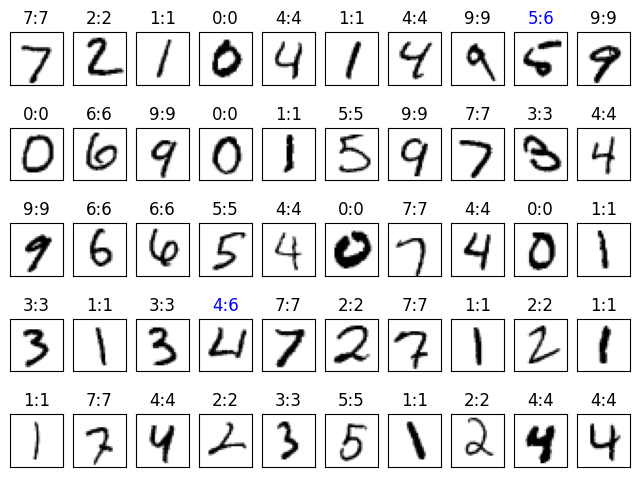

In [33]:
plt.figure(figsize=(8, 6))
for i in range(50): # 처음 50개 이미지에 대하여 확인
  ax = plt.subplot(5, 10, i + 1)
  # 넘파이 배열로 변환
  image = images[i]
  label = labels[i]
  pred = predicted[i]

  if (pred == label): # 정답과 예측이 동일하면 검은색으로,
    color = 'black'
  else: # 다른 결과가 나왔다면 푸른색으로 지정
    color = 'blue'

  # 이미지 출력
  plt.imshow(image.reshape(28, 28),cmap='gray_r')
  ax.set_title(f'{label}:{pred}', c=color)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()